## Convolutional Neural Networks with Data Augmentation using Keras

In this tutorial I will be using Keras with TensorFlow as backend to calssify digits from the MNIST Dataset

https://www.kaggle.com/moghazy/guide-to-cnns-with-data-augmentation-keras

In [2]:
import numpy
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils

In [14]:
path = os.getcwd()
datapath = path[:24]

In [3]:
from keras.models import Sequential
import pandas as pd

model = Sequential()

K.set_image_data_format('channels_last') # Tensorflow's convention 
numpy.random.seed(0)


In [4]:
## --- Load the data
# Dataset of 56,000 28x28 grayscale images of the 10 digits, 
# each image has 784 features. This is because each image is 28×28 pixels,
# along with a test set of 14,000 images. 
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
# Get training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape, sep='\n')

(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [6]:
# We then reshape the samples according to TensorFlow convention 
# which we chosed previously using "K.set_image_data_format('channels_last')" 
# Here we have only one channel because we are using the image in grayscale not RGB. 
# samples,rows,columns,channels

X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')
print(X_train.shape,X_test.shape, sep='\n')

(56000, 28, 28, 1)
(14000, 28, 28, 1)


In [7]:
## --- Explore the data

import matplotlib.pyplot as plt

print("the number of training examples = %i" % X_train.shape[0])
print("the number of classes = %i" % len(numpy.unique(y_train)))
print("Dimention of images = {:d} x {:d}  ".format(X_train[1].shape[0],X_train[1].shape[1])  )

#This line will allow us to know the number of occurrences of each specific class in the data
unique, count= numpy.unique(y_train, return_counts=True)
print("The number of occuranc of each class in the dataset = \n%s " % dict (zip(unique, count) ), "\n" )
 

the number of training examples = 56000
the number of classes = 10
Dimention of images = 28 x 28  
The number of occuranc of each class in the dataset = 
{0.0: 5554, 1.0: 6296, 2.0: 5590, 3.0: 5707, 4.0: 5496, 5.0: 5027, 6.0: 5469, 7.0: 5817, 8.0: 5434, 9.0: 5610}  



Shape of image and labels: 56000 x 2
Shape of one example of image_and_labels: 28 x 28 x 1


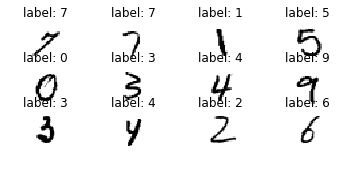

In [8]:
import numpy as np
images_and_labels = list(zip(X_train,  y_train))
print("Shape of image and labels: {:d} x {:d}".format(np.array(images_and_labels).shape[0],np.array(images_and_labels).shape[1]))
print("Shape of one example of image_and_labels: {:d} x {:d} x {:d}".format(np.array(images_and_labels[0][0]).shape[0], np.array(images_and_labels[0][0]).shape[1], np.array(images_and_labels[0][0]).shape[2]))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )

In [23]:
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# For the sequential model you just stack the layers and 
# only specify the image input dimensions in the first layer. 

# Our first layer will be a convolutional layer Conv2D() where we specify the number of feature maps

model.add(Conv2D(40, kernel_size=5, padding="same",input_shape=(28, 28, 1), activation = 'relu'))

# We then add the max pooling layer (which is the most common kind of pooling) 
# with a kernel of dimensions 2 * 2 .

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [24]:
# Lets add the 2nd layer but this time we increase the feature maps .

model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(500, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(1024, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [25]:
# Now we add a flatten layer that takes the output of the CNN and 
# flattens it and passes it as an input to the Dense Layers which passes it to the output layer. 
# Every dense layer contains 300 neurons except for the output layer. 
# We use Softmax with the output layer to output estimated probability vector for multi-class classification .

from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [26]:
y_train, len(y_train)

(array([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]], dtype=int32), 56000)

In [27]:
# We have used categorical_crossentropy as the cost function 
# We are using adam optimizer which is one of the best gradient descent algorithms.
# One hot encoding:
y_train = np_utils.to_categorical(y_train).astype('int32')
y_test = np_utils.to_categorical(y_test)

In [28]:
y_train, len(y_train)

(array([[[1, 0],
         [1, 0],
         [1, 0],
         ...,
         [0, 1],
         [1, 0],
         [1, 0]],
 
        [[1, 0],
         [1, 0],
         [1, 0],
         ...,
         [0, 1],
         [1, 0],
         [1, 0]],
 
        [[1, 0],
         [0, 1],
         [1, 0],
         ...,
         [1, 0],
         [1, 0],
         [1, 0]],
 
        ...,
 
        [[1, 0],
         [1, 0],
         [1, 0],
         ...,
         [1, 0],
         [1, 0],
         [0, 1]],
 
        [[0, 1],
         [1, 0],
         [1, 0],
         ...,
         [1, 0],
         [1, 0],
         [1, 0]],
 
        [[1, 0],
         [1, 0],
         [0, 1],
         ...,
         [1, 0],
         [1, 0],
         [1, 0]]], dtype=int32), 56000)

In [29]:
# Use ImageDataGenerator from keras to augment the images.
# Centering the images, normalization, rotation, shifting, and flipping 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Shifting...
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

from keras.preprocessing.image import ImageDataGenerator
X_train2 = numpy.array(X_train, copy=True) 
y_train2 = numpy.array(y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    )

datagen.fit(X_train)

print(type(X_train2))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# Concatenating the old data with the augmented data
result_x  = numpy.concatenate((X_train, X_train2), axis=0)
result_y  = numpy.concatenate((y_train, y_train2), axis=0)

### Time spent: 11h 43m !!!!

In [16]:
# # fits the model on batches with real-time data augmentation:
from time import time
start = time()

history = model.fit_generator(datagen.flow(result_x, result_y, batch_size=35),
                    steps_per_epoch=len(X_train) / 32, epochs = 12)

print('Time spend:', time()-start)

Epoch 1/12
3200/1750 [======================================================] - 3651s 1s/step - loss: 0.1047 - acc: 0.9725
Epoch 2/12
3200/1750 [======================================================] - 3593s 1s/step - loss: 0.0739 - acc: 0.9822
Epoch 3/12
3200/1750 [======================================================] - 3123s 976ms/step - loss: 0.0620 - acc: 0.9850
Epoch 4/12
3200/1750 [======================================================] - 3207s 1s/step - loss: 0.0604 - acc: 0.9862
Epoch 5/12
3200/1750 [======================================================] - 3451s 1s/step - loss: 0.0495 - acc: 0.9882
Epoch 6/12
3200/1750 [======================================================] - 3454s 1s/step - loss: 0.0506 - acc: 0.9887
Epoch 7/12
3200/1750 [======================================================] - 3478s 1s/step - loss: 0.0510 - acc: 0.9890
Epoch 8/12
3200/1750 [======================================================] - 3895s 1s/step - loss: 0.0562 - acc: 0.9876
Epoch 9/12
32

In [17]:
history

In [18]:
# Takes ~ 2 min
# model.fit(X_train, y_train, epochs= 32 , batch_size=200, validation_split = 0.2)
scores = model.evaluate(X_test, y_test, verbose = 10 )

In [19]:

print ( scores )


[0.18328269741015746, 0.9881428571428571]


In [23]:
import os
os.chdir('/Users/iZbra1/Documents/DS tools/')

In [26]:
test = pd.read_csv('test.csv')

In [27]:
# Takes 185 s
start = time()
test_set = (test.values).reshape(-1, 28, 28 , 1).astype('float32')

res = model.predict(test_set)
res = numpy.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)
print(time()-start,'s')
submission.head(10)


185.74328923225403 s


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


### Save the model

In [32]:
path = '/Users/iZbra1/Documents/DS tools/'
os.chdir(path+'data/CNN_example')

In [ ]:
# Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.
# The model structure can be described and saved using two different formats: JSON and YAML.

# serialize (architecture of) model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
os.listdir(path+'data/CNN_example')

To open model:

'/Users/iZbra1/Documents/K2DS/Projects/book_cover_recommender/notebooks'

In [16]:
os.chdir(datapath+'DS tools/data/CNN_example/')
os.listdir()

['model.json', 'cnn_mnist_datagen.csv', 'test.csv', 'model.h5']

In [30]:
from keras.models import model_from_json


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [18]:
loaded_model

In [31]:
# Takes 185 s

test_set = (test.values).reshape(-1, 28, 28 , 1).astype('float32')
test = pd.read_csv('test.csv')
res = loaded_model.predict(test_set)
res = numpy.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

submission.head(10)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
